<a href="https://colab.research.google.com/github/IshanBadiyani/ISOM_835_Term-Project_Ishan-Badiyani/blob/main/Telco_Churn_Notebook_(Ishan).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

#Loading the file using Pandas
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

#Initial Data Summary
print(df.shape)
print(df.info())
df.describe()

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# **VISUALIZATION OF KEY FEATURE**

<ipython-input-9-ddc8e2c8b5db>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


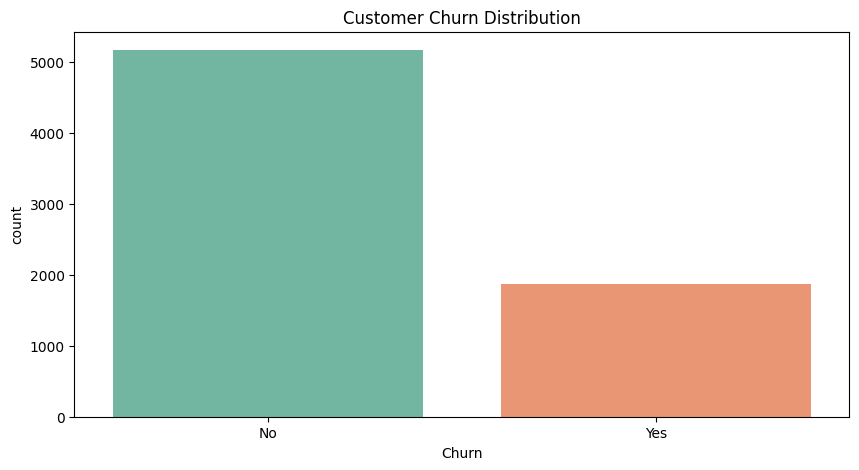

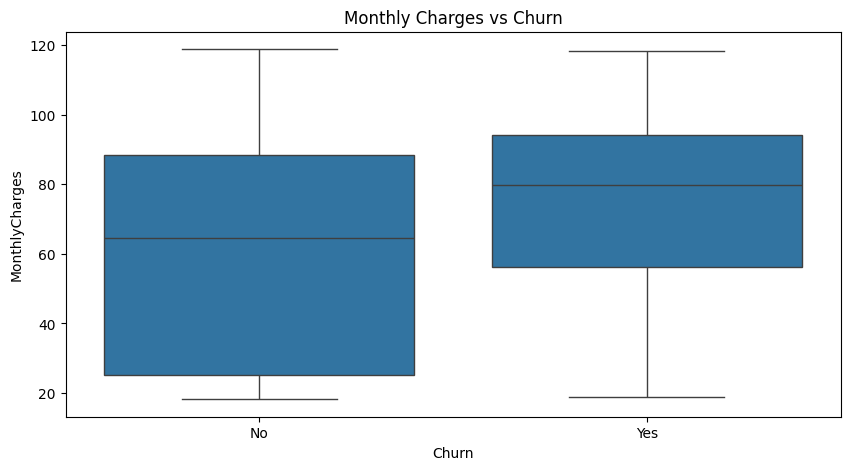

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Customer Churn Distribution')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges vs Churn')
plt.show()


# **Data Cleaning Tasks**

**Preprocessing**


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# STEP 1: Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# STEP 2: Convert 'SeniorCitizen' from 0/1 to 'Yes'/'No'
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})


# STEP 3: Confirm there are no missing values
assert df.isnull().sum().sum() == 0, "There are missing values in the dataset!"

# STEP 4: One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# STEP 5: Scale numeric columns
from sklearn.preprocessing import StandardScaler

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Final check
df_encoded.head()


,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,-1.277445,-1.160323,-0.994242,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0.066327,-0.259629,-0.173244,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,-1.236724,-0.362660,-0.959674,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0.514251,-0.746535,-0.194766,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,-1.236724,0.197365,-0.940470,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


## **Predictive Modelling and Evaluation**

I tested three models to predict churn: Logistic Regression (simple and interpretable), Random Forest (captures complex patterns and shows feature importance), and XGBoost (high-performance boosting model).

Each was trained on the processed data and evaluated using Accuracy, F1 Score, and ROC-AUC to measure both overall performance and how well they handle class imbalance.



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Split dataset
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Dictionary to store results
results = {}

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, lr_preds),
    'F1 Score': f1_score(y_test, lr_preds),
    'ROC-AUC': roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
}

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, rf_preds),
    'F1 Score': f1_score(y_test, rf_preds),
    'ROC-AUC': roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
}

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, xgb_preds),
    'F1 Score': f1_score(y_test, xgb_preds),
    'ROC-AUC': roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])
}

# Display results
for model, metrics in results.items():
    print(f"\n{model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:24:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Logistic Regression
Accuracy: 0.8048
F1 Score: 0.6032
ROC-AUC: 0.8420

Random Forest
Accuracy: 0.7864
F1 Score: 0.5501
ROC-AUC: 0.8253

XGBoost
Accuracy: 0.7821
F1 Score: 0.5621
ROC-AUC: 0.8166
